### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('marketing_campaign.csv',sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.loc[data.isnull().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [ ]:
data.Income.describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [ ]:
data.Income.fillna(data.Income.median(), inplace=True)

/tmp/ipython-input-226401031.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Income.fillna(data.Income.median(), inplace=True)


In [ ]:
data.Income.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Income
Non-Null Count  Dtype  
--------------  -----  
2240 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB


**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [ ]:
data.Dt_Customer = pd.to_datetime(data.Dt_Customer,format='%d-%m-%Y')

In [ ]:
data.Dt_Customer

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19
...,...
2235,2013-06-13
2236,2014-06-10
2237,2014-01-25
2238,2014-01-24


In [ ]:
data['YearWithCompany'] = round(((pd.to_datetime("today",format='%d-%m-%Y') - data["Dt_Customer"]).dt.days)/365,2)

In [ ]:
cat_cols = data.select_dtypes('object').columns.tolist()

In [ ]:
data[cat_cols]

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [ ]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
edu_map = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}
data['Education_encoded'] = data.Education.map(edu_map)

In [ ]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
data.Marital_Status.value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
status_clean = {
    "Married": "Married",
    "Together": "Together",
    "Single": "Single",
    "Divorced": "Divorced",
    "Widow": "Widow",
    "Alone": "Other",
    "Absurd": "Other",
    "YOLO": "Other"
}
data["Marital_Status_clean"] = data.Marital_Status.map(status_clean)

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,YearWithCompany,Education_encoded,Marital_Status_clean
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,13.08,2,Single
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,11.58,2,Single
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,12.12,2,Together
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,11.65,2,Together
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,11.71,4,Married


In [ ]:
data = pd.get_dummies(data, columns=["Marital_Status_clean"], drop_first=True,dtype=int)

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,YearWithCompany,Education_encoded,Marital_Status_clean_Married,Marital_Status_clean_Other,Marital_Status_clean_Single,Marital_Status_clean_Together,Marital_Status_clean_Widow
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,13.08,2,0,0,1,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,11.58,2,0,0,1,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,12.12,2,0,0,0,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,11.65,2,0,0,0,1,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,11.71,4,1,0,0,0,0


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [ ]:
X = data.drop(['Education','Marital_Status','ID','Dt_Customer'], axis=1)

In [ ]:
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,YearWithCompany,Education_encoded,Marital_Status_clean_Married,Marital_Status_clean_Other,Marital_Status_clean_Single,Marital_Status_clean_Together,Marital_Status_clean_Widow
0,1957,58138.0,0,0,58,635,88,546,172,88,...,3,11,1,13.08,2,0,0,1,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,3,11,0,11.58,2,0,0,1,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,3,11,0,12.12,2,0,0,0,1,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,3,11,0,11.65,2,0,0,0,1,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,11,0,11.71,4,1,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[0 1 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
sil_score_km = silhouette_score(X, labels)
sil_score_km

np.float64(0.5984527985505632)

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [ ]:
X['TotalPurch'] = X.NumCatalogPurchases + X.NumDealsPurchases + X.NumStorePurchases + X.NumWebPurchases
X['TotalSpend'] = X.MntFishProducts + X.MntFruits + X.MntGoldProds + X.MntMeatProducts + X.MntSweetProducts + X.MntWines

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    X,
    x="Income",
    y="TotalPurch",
    z="TotalSpend",
    color=labels.astype(str),
    opacity=0.7
)
fig.show()



> кластер 2 (той що зелений) виглядає що появився тільки завдяки викиду в доходах, відповідно можна було б краще почистити дані, щоб уникнути такого
> можна ще спробувати інші колонки, але тяжко буде підібрати важливість
> в основному видно два кластери, але вони не дуже чітко розділені




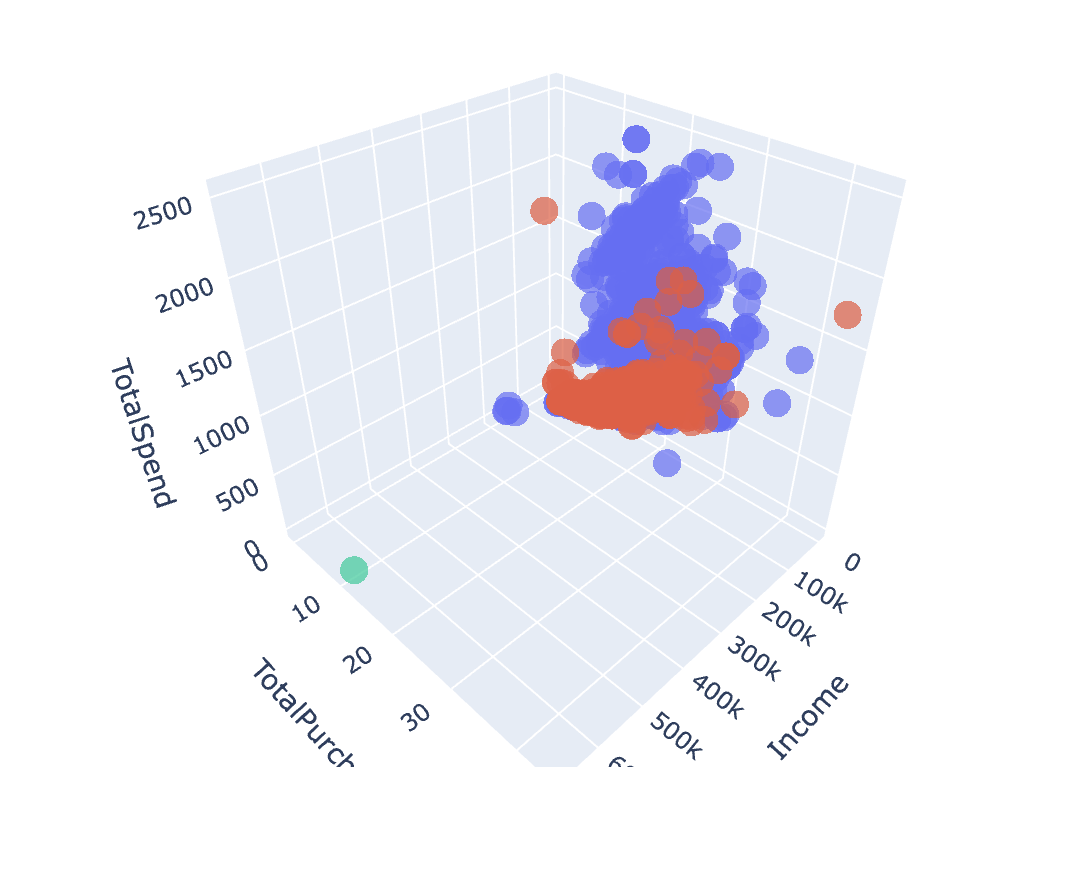



**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [ ]:
num_col = X.select_dtypes('number').columns.tolist()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col])

In [ ]:
kmeans_sc = KMeans(n_clusters=3, n_init='auto')
kmeans_sc.fit(X_scaled)

labels_sc = kmeans_sc.predict(X_scaled)
print(labels_sc)

[2 1 2 ... 2 2 1]


In [ ]:
sil_score_km_scaled = silhouette_score(X_scaled, labels_sc)
sil_score_km_scaled

np.float64(0.22603597534402095)

стало гірше)) тут тепер або не достатньо кластерів, або масштабування зіпсувало взагалі логіку даних

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [ ]:
X.Income.sort_values()

,Income
1245,1730.0
21,2447.0
1524,3502.0
1846,4023.0
1975,4428.0
...,...
164,157243.0
1300,157733.0
687,160803.0
617,162397.0


In [ ]:
#X.drop(X[X.Income == 666666].index, inplace=True )
Q1 = X.Income.quantile(0.25)
Q3 = X.Income.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
X = X[(X.Income >= lower) & (X.Income <= upper)]

In [ ]:
Q1 = X.Year_Birth.quantile(0.25)
Q3 = X.Year_Birth.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
X = X[(X.Year_Birth >= lower) & (X.Year_Birth <= upper)]

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

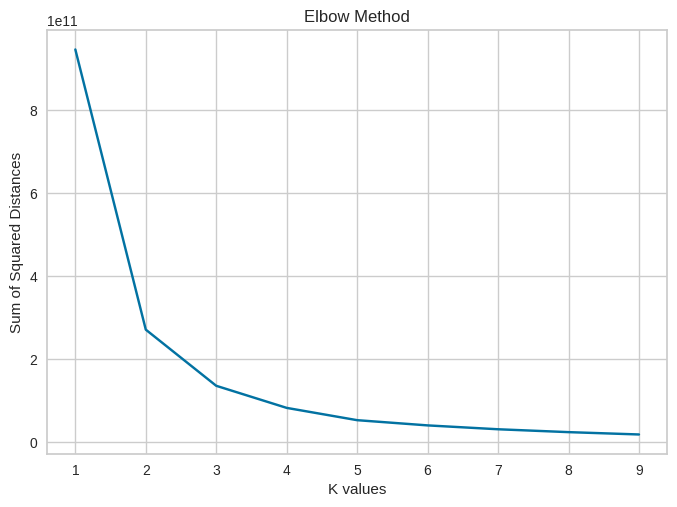

In [ ]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Amount of cluster:  2  Silhouette Score: 0.6024173477588712
Amount of cluster:  3  Silhouette Score: 0.5513833543969323
Amount of cluster:  4  Silhouette Score: 0.5324074635905807
Amount of cluster:  5  Silhouette Score: 0.538770313769773


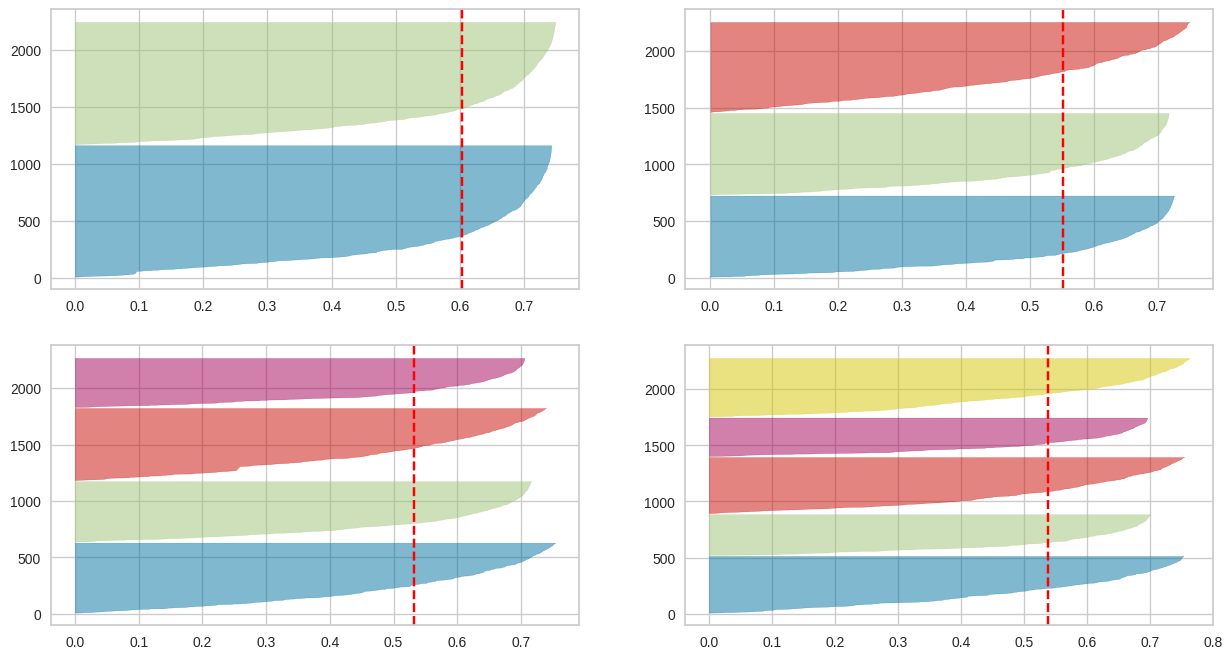

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in [2, 3, 4,5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    sil_score_km_el = silhouette_score(X, km.labels_)
    print("Amount of cluster: ",i," Silhouette Score:",sil_score_km_el)


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Response,YearWithCompany,Education_encoded,Marital_Status_clean_Married,Marital_Status_clean_Other,Marital_Status_clean_Single,Marital_Status_clean_Together,Marital_Status_clean_Widow,TotalPurch,TotalSpend
0,1957,58138.0,0,0,58,635,88,546,172,88,...,1,13.08,2,0,0,1,0,0,25,1617
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,11.58,2,0,0,1,0,0,6,27
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,12.12,2,0,0,0,1,0,21,776
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,11.65,2,0,0,0,1,0,8,53
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,11.71,4,1,0,0,0,0,19,422


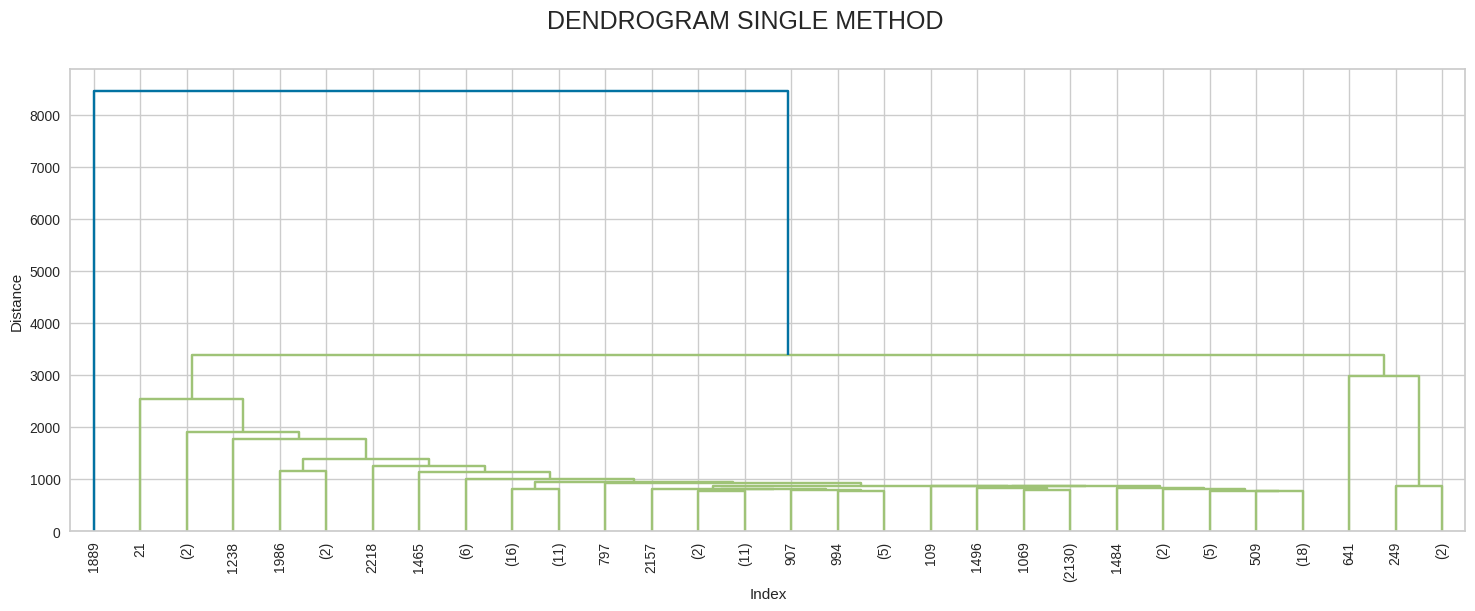

In [ ]:
dist_sin = linkage(X, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90,truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [ ]:
X['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

Silhouette score for k=2: 0.557
Silhouette score for k=3: 0.450


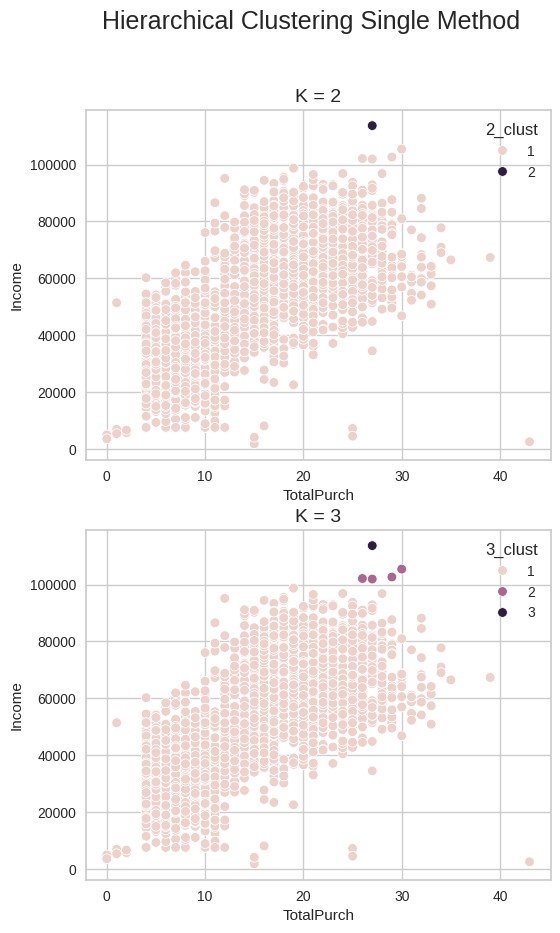

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(2,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="TotalPurch",y="Income", data=X, hue="2_clust")
print(f"Silhouette score for k=2: {silhouette_score(X, X['2_clust']):.3f}")

plt.subplot(2,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="TotalPurch",y="Income", data=X, hue="3_clust")
print(f"Silhouette score for k=3: {silhouette_score(X, X['3_clust']):.3f}")


з цих графіків напевно єдине що випливає шо single linkage метод явно не для цих данних

не вичистила всі оутлайнери,відпвідно він на них реагує теж, плюс багато точок скупчені одні на одних

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

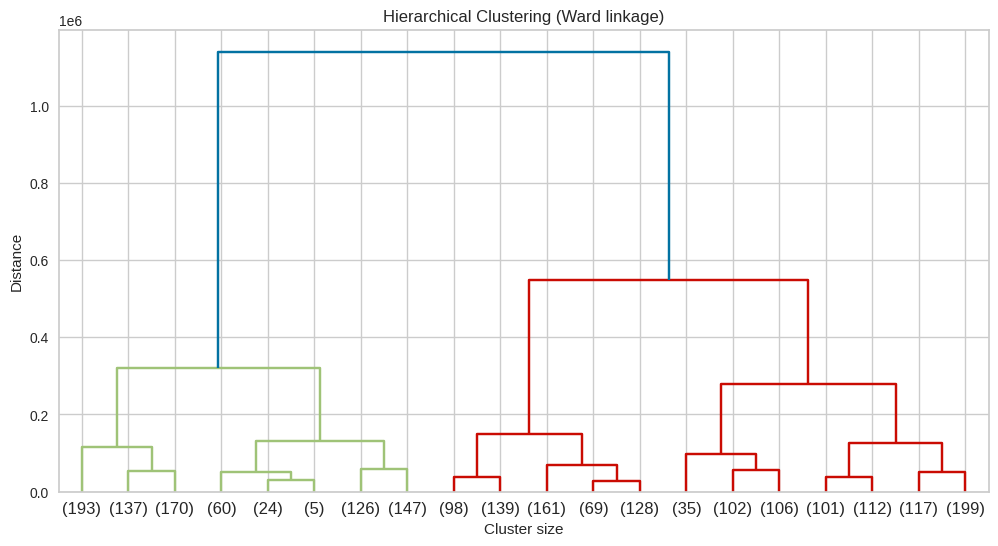

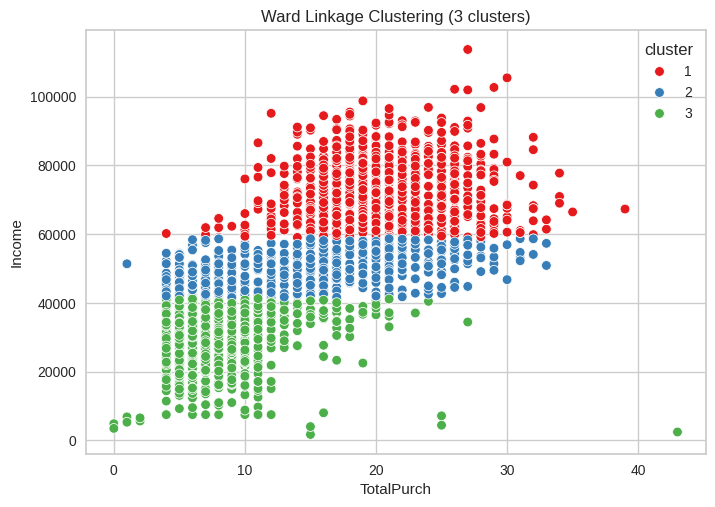

Silhouette Score (Ward, k=3): 0.524


In [ ]:
X_ward = X.copy()
X_ward.drop(['2_clust','3_clust'],axis=1)
# Ward linkage
dist_ward = linkage(X_ward, method='ward')

# Dendrogram (truncated for readability)
plt.figure(figsize=(12,6))
dendrogram(dist_ward, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.title("Hierarchical Clustering (Ward linkage)")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()

# Cut into 3 clusters
clusters = fcluster(dist_ward, 3, criterion='maxclust')
X_ward['cluster'] = clusters

# Visualize
sns.scatterplot(data=X_ward, x='TotalPurch', y='Income', hue='cluster', palette='Set1')
plt.title("Ward Linkage Clustering (3 clusters)")
plt.show()

# Silhouette score
sil = silhouette_score(X_ward, clusters)
print(f"Silhouette Score (Ward, k=3): {sil:.3f}")

якщо брати до уваги суто кластери, то певно це найкращий результат, хоча Silhouette Score не є найкращий

але візуальний розподіл виглядає дуже логічно

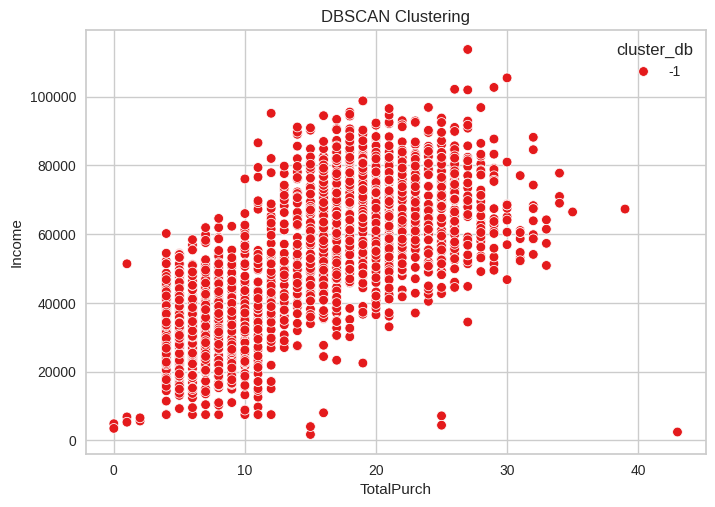

DBSCAN found only one cluster.


In [ ]:
from sklearn.cluster import DBSCAN

X_scaled = StandardScaler().fit_transform(X_ward)
db = DBSCAN(eps=0.5, min_samples=4).fit(X_scaled)
labels = db.labels_


X_ward['cluster_db'] = labels

# Visualize
sns.scatterplot(data=X_ward, x='TotalPurch', y='Income', hue='cluster_db', palette='Set1')
plt.title("DBSCAN Clustering")
plt.show()

# Evaluate (only if >1 cluster found)
if len(set(labels)) > 1:
    sil = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score (DBSCAN): {sil:.3f}")
else:
    print("DBSCAN found only one cluster.")

для DBSCAN напевно всі точки занадто близько один до одного щоб поділити на більше кластерів

але якщо зменшити min_samples , то він шурує прям багато тих кластерів (в більшості випадки оутлайнери)

також може скейлінг не вийшов вдалим